<a href="https://colab.research.google.com/github/jgesc-05/clase-inteligencia-artificial/blob/main/Fundamento_Cuaderno_20_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  <font color="blue"> Cuaderno 20. Análisis de Componentes Principales (PCA) </font>

##20.1 Introducción
El Análisis de Componentes Principales (PCA) es una técnica de reducción de dimensionalidad utilizada para simplificar espacios de alta dimensión mientras se conserva la mayor cantidad de información posible. Dado un conjunto de datos con 𝑛 observaciones y 𝑝 variables ($𝑋_1$,$𝑋_2$,...,$𝑋_𝑝$), el PCA permite encontrar 𝑧<𝑝 componentes principales que expliquen la mayor parte de la variabilidad en los datos originales.

La idea central, como  se observa en la imagen,  es transformar el conjunto de variables correlacionadas en un conjunto más pequeño de variables no correlacionadas llamadas componentes principales. Estas componentes capturan la varianza de los datos y permiten una interpretación más clara y manejable. Esto es útil en tareas como visualización de datos, preprocesamiento de modelos supervisados y compresión de datos.

![imagen](https://github.com/adiacla/bigdata/blob/master/pca.png?raw=true)

##20.2 Álgebra Lineal
###Eigenvectors
Los eigenvectores son vectores que mantienen su dirección tras ser multiplicados por una matriz cuadrada. Matemáticamente, esto se expresa como:

$$A \cdot v = \lambda \cdot v$$

Donde
𝐴 es la matriz, 𝑣 es el eigenvector, y 𝜆 es el eigenvalue asociado.

Los eigenvectores tienen las siguientes propiedades clave:

* Existen solo para matrices cuadradas.
* Son ortogonales entre sí.
* Pueden ser escalados para tener longitud unitaria.


###Eigenvalues

Los eigenvalues (𝜆) son los factores de escala asociados a los eigenvectores.

En PCA, los eigenvalues determinan la importancia de cada componente principal.

La primera componente principal se asocia al eigenvector con el eigenvalue más alto, representando la dirección de mayor varianza.



##20.3 Interpretación Geométrica

Desde una perspectiva geométrica, las componentes principales son ejes en los que los datos tienen máxima varianza. Por ejemplo, para dos variables ($𝑋_1$ y $𝑋_2$), la primera componente principal (𝑍1​) sigue la dirección de máxima varianza, mientras que la segunda componente (𝑍2) es ortogonal a 𝑍1 y representa la segunda mayor varianza.

En la siguiente gráfica podrá apreciarse los vectores y valores de los datos $𝑋_1$ y $𝑋_2$



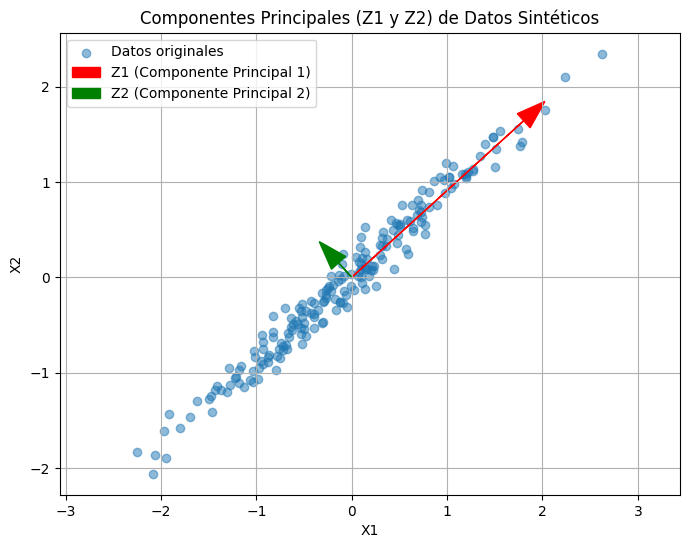

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Generar datos sintéticos
np.random.seed(0)
X = np.dot(np.random.rand(2, 2), np.random.randn(2, 200)).T  # Datos correlacionados

# Aplicar PCA para obtener los componentes principales
pca = PCA(n_components=2)
pca.fit(X)
Z = pca.transform(X)  # Datos transformados (proyectados en los componentes principales)

# Obtener los vectores de los componentes principales
z1 = pca.components_[0] * np.sqrt(pca.explained_variance_[0]) * 2 # Escalar para visualización
z2 = pca.components_[1] * np.sqrt(pca.explained_variance_[1]) * 2 # Escalar para visualización


# Graficar los datos originales y los componentes principales
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], alpha=0.5, label="Datos originales")
plt.arrow(0, 0, z1[0], z1[1], head_width=0.2, head_length=0.3, fc='r', ec='r', label="Z1 (Componente Principal 1)")
plt.arrow(0, 0, z2[0], z2[1], head_width=0.2, head_length=0.3, fc='g', ec='g', label="Z2 (Componente Principal 2)")


plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Componentes Principales (Z1 y Z2) de Datos Sintéticos")
plt.grid(True)
plt.legend()
plt.axis('equal') # Importante para visualizar la perpendicularidad de los componentes
plt.show()

##20.4 Cálculo de las Componentes Principales
Cada componente principal (𝑍𝑖) es una combinación lineal de las variables originales $(𝑋_1,𝑋_2,...,𝑋_𝑝)$: $Z_1 = \phi_{11} X_1 + \phi_{21} X_2 + \cdots + \phi_{p1} X_p$

Donde los coeficientes (𝜙𝑖𝑗) son los "loadings" que determinan la contribución de cada variable a la componente.

Para calcular las componentes:

* Centrar las Variables: Sustraer la media de cada variable para que tengan media cero.
* Maximizar la Varianza: Resolver un problema de optimización utilizando eigenvectores y eigenvalues.
* Iterar: Repetir el proceso para calcular componentes adicionales, asegurando que sean ortogonales a las previas.


##20.5 Escalado de las Variables

El PCA es sensible a la escala de las variables, ya que la varianza se mide en unidades al cuadrado. Es fundamental estandarizar los datos para que todas las variables tengan media cero y desviación estándar igual a uno antes de aplicar PCA. Esto asegura que las variables con mayores unidades no dominen el análisis.

##20.6 Influencia de Outliers

El PCA puede ser muy sensible a outliers, ya que estos tienen un impacto significativo en la varianza. Es importante identificar y tratar outliers antes de realizar el análisis para garantizar resultados fiables.



## 20.7 Proporción de Varianza Explicada

La varianza explicada por una componente principal indica cuánta información de los datos originales está capturando. La proporción de varianza explicada por la 𝑚 m-ésima componente principal se calcula como:
$$
\text{Proporción de varianza explicada} = \frac{\sum_{i=1}^n \left( \sum_{j=1}^p \phi_{jm} x_{ij} \right)^2}{\sum_{j=1}^p \sum_{i=1}^n x_{ij}^2}
$$
Esto permite evaluar la cantidad de información conservada al reducir las dimensiones.



20.8 Número Óptimo de Componentes Principales

El número óptimo de componentes principales se determina evaluando la proporción de varianza explicada acumulada. Un criterio común es seleccionar el número mínimo de componentes necesarias para capturar un umbral deseado de varianza, mayor que el 80%, en el siguiente ejemplo de la imagen se toma  el 95%.

![imagen](https://github.com/adiacla/bigdata/blob/master/nopca2.png?raw=true)

#20.8 Taller Análisis de Componentes Principales

---

###Importar las librerías

In [1]:
# Taller de PCA: Análisis de Componentes Principales
# ================================================

# Importar librerías necesarias
# ------------------------------------
# Se importan las librerías necesarias para análisis de datos, visualización
# y modelado PCA.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline


##Cargar el conjunto de datos
Cargamos el dataset que contiene datos sobre clientes, este dataset es sintético (es decir lo generamos a través de unas variables aleatorias con cierta distribución) en la cual incluimos información demográfica y financiera.

In [2]:

# Definir número de filas para los datos sintéticos
n = 100  # 100 clientes sintéticos

# Generar datos sintéticos para las 10 nuevas columnas
np.random.seed(42)  # Fijar semilla para reproducibilidad

# Datos existentes
IDs = np.arange(1001, 1001 + n)
genero = np.random.choice(['Male', 'Female'], size=n)
edad = np.random.randint(18, 70, size=n)  # Edad entre 18 y 70 años
ciudades = np.random.choice(['Bucaramanga', 'Bogotá', 'Medellín', 'Cali', 'Barranquilla'], size=n)
ingresos = np.random.uniform(100000, 1000000, size=n)  # Ingresos entre 100,000 y 1,000,000
credito = np.random.randint(500, 1000, size=n)  # Crédito entre 500 y 1000
gastos = np.random.randint(50, 500, size=n)  # Gastos entre 50 y 500
trabajo = np.random.randint(1, 5, size=n)  # Categorías de trabajo (1 a 4)

# Nuevas columnas sintéticas
nivel_educativo = np.random.choice(['Primaria', 'Secundaria', 'Técnico', 'Universitario'], size=n)
estado_civil = np.random.choice(['Soltero', 'Casado', 'Divorciado'], size=n)
hijos = np.random.randint(0, 5, size=n)  # Número de hijos (0 a 4)
deuda = np.random.uniform(0, 50000, size=n)  # Monto de deuda (0 a 50,000)
tipo_trabajo = np.random.choice(['Emprendedor', 'Empleado', 'Independiente'], size=n)
vivienda = np.random.choice(['Propia', 'Alquilada', 'Hipotecada'], size=n)
salud = np.random.choice(['Privada', 'Pública'], size=n)
ahorros = np.random.uniform(0, 100000, size=n)  # Monto de ahorros (0 a 100,000)
consumo_energia = np.random.uniform(50, 500, size=n)  # Consumo de energía mensual (50 a 500)

# Crear un DataFrame con los datos sintéticos
data = pd.DataFrame({
    'ID': IDs,
    'Genero': genero,
    'Edad': edad,
    'Ciudad': ciudades,
    'Ingresos': ingresos,
    'Credito': credito,
    'gastos': gastos,
    'trabajo': trabajo,
    'Nivel_Educativo': nivel_educativo,
    'Estado_Civil': estado_civil,
    'Hijos': hijos,
    'Deuda': deuda,
    'Tipo_Trabajo': tipo_trabajo,
    'Vivienda': vivienda,
    'Salud': salud,
    'Ahorros': ahorros,
    'Consumo_Energia': consumo_energia
})
data

,ID,Genero,Edad,Ciudad,Ingresos,Credito,gastos,trabajo,Nivel_Educativo,Estado_Civil,Hijos,Deuda,Tipo_Trabajo,Vivienda,Salud,Ahorros,Consumo_Energia
0,1001,Male,35,Medellín,334746.257347,649,267,3,Universitario,Soltero,4,9114.193924,Independiente,Propia,Pública,21951.052508,300.112962
1,1002,Female,43,Medellín,996628.329782,813,481,1,Secundaria,Soltero,4,28198.254601,Emprendedor,Alquilada,Privada,97454.726520,262.944553
2,1003,Male,61,Cali,968877.416160,557,390,3,Universitario,Divorciado,1,42035.499294,Empleado,Hipotecada,Pública,77975.877479,190.784685
3,1004,Male,51,Bogotá,602464.108246,841,88,1,Técnico,Casado,2,4460.216436,Emprendedor,Hipotecada,Privada,11423.792592,104.235160
4,1005,Male,27,Bogotá,894372.708870,804,149,3,Técnico,Divorciado,2,26766.778201,Independiente,Propia,Privada,56577.661997,378.960652
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1096,Female,60,Cali,494626.710716,945,239,3,Secundaria,Casado,1,15809.829115,Emprendedor,Alquilada,Pública,5159.580666,330.321822
96,1097,Female,46,Bogotá,704823.521766,999,273,3,Universitario,Divorciado,2,29415.333790,Empleado,Alquilada,Privada,66991.746455,386.542222
97,1098,Female,53,Bucaramanga,395337.400727,952,86,1,Secundaria,Soltero,2,34149.103171,Independiente,Alquilada,Pública,4416.543771,65.689322
98,1099,Female,30,Cali,239537.455055,703,317,1,Universitario,Soltero,0,22597.430065,Emprendedor,Hipotecada,Privada,58826.375697,452.714649


###Codificar las variables categóricas

Para preparar los datos para un análisis de PCA, necesitas convertir las columnas categóricas en valores numéricos. Esto se puede hacer utilizando diferentes técnicas de codificación, dependiendo de cómo quieras representar las categorías. Las dos técnicas más comunes son:

**One-Hot Encoding**: Convierte cada categoría de una variable en una columna separada, con valores binarios (0 o 1). Esta técnica es útil cuando las categorías no tienen un orden natural entre ellas (por ejemplo, Genero o Estado_Civil).

**Label Encoding**: Convierte cada categoría en un número entero único. Es útil cuando las categorías tienen un orden natural (por ejemplo, Nivel_Educativo si consideras que "Primaria" < "Secundaria" < "Técnico" < "Universitario").


In [5]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder


# 1. One-Hot Encoding (para variables categóricas sin orden)
# Convertimos las columnas categóricas en variables dummy (0 o 1)
data_one_hot = pd.get_dummies(data, columns=['Genero', 'Ciudad', 'Estado_Civil',
                                                      'Tipo_Trabajo', 'Vivienda', 'Salud'], drop_first=True)

# 2. Label Encoding (para variables categóricas con orden)
# Crear un LabelEncoder para codificar columnas con orden (Nivel_Educativo en este caso)
label_encoder = LabelEncoder()

# Codificar la columna 'Nivel_Educativo'
data_one_hot['Nivel_Educativo'] = label_encoder.fit_transform(data_one_hot['Nivel_Educativo'])

# Visualizamos el resultado
data_one_hot


,ID,Edad,Ingresos,Credito,gastos,trabajo,Nivel_Educativo,Hijos,Deuda,Ahorros,...,Ciudad_Bucaramanga,Ciudad_Cali,Ciudad_Medellín,Estado_Civil_Divorciado,Estado_Civil_Soltero,Tipo_Trabajo_Emprendedor,Tipo_Trabajo_Independiente,Vivienda_Hipotecada,Vivienda_Propia,Salud_Pública
0,1001,35,334746.257347,649,267,3,3,4,9114.193924,21951.052508,...,False,False,True,False,True,False,True,False,True,True
1,1002,43,996628.329782,813,481,1,1,4,28198.254601,97454.726520,...,False,False,True,False,True,True,False,False,False,False
2,1003,61,968877.416160,557,390,3,3,1,42035.499294,77975.877479,...,False,True,False,True,False,False,False,True,False,True
3,1004,51,602464.108246,841,88,1,2,2,4460.216436,11423.792592,...,False,False,False,False,False,True,False,True,False,False
4,1005,27,894372.708870,804,149,3,2,2,26766.778201,56577.661997,...,False,False,False,True,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1096,60,494626.710716,945,239,3,1,1,15809.829115,5159.580666,...,False,True,False,False,False,True,False,False,False,True
96,1097,46,704823.521766,999,273,3,3,2,29415.333790,66991.746455,...,False,False,False,True,False,False,False,False,False,False
97,1098,53,395337.400727,952,86,1,1,2,34149.103171,4416.543771,...,True,False,False,False,True,False,True,False,False,True
98,1099,30,239537.455055,703,317,1,3,0,22597.430065,58826.375697,...,False,True,False,False,True,True,False,True,False,False


In [6]:
data_one_hot.shape
#El data finalmente quedaron 23 columnas.

(100, 23)

###Seleccionar columnas numéricas
Extraemos las columnas numéricas del dataset, ya que PCA no funciona con datos categóricos y retiramos la columna ID.



In [7]:
# Seleccionamos todas las columnas numéricas para el análisis.

data_numeric = data_one_hot.drop('ID', axis=1)


###Visualización de datos: Gráfico de caja y bigotes
Creamos un gráfico para identificar la distribución de las variables y detectar posibles outliers.



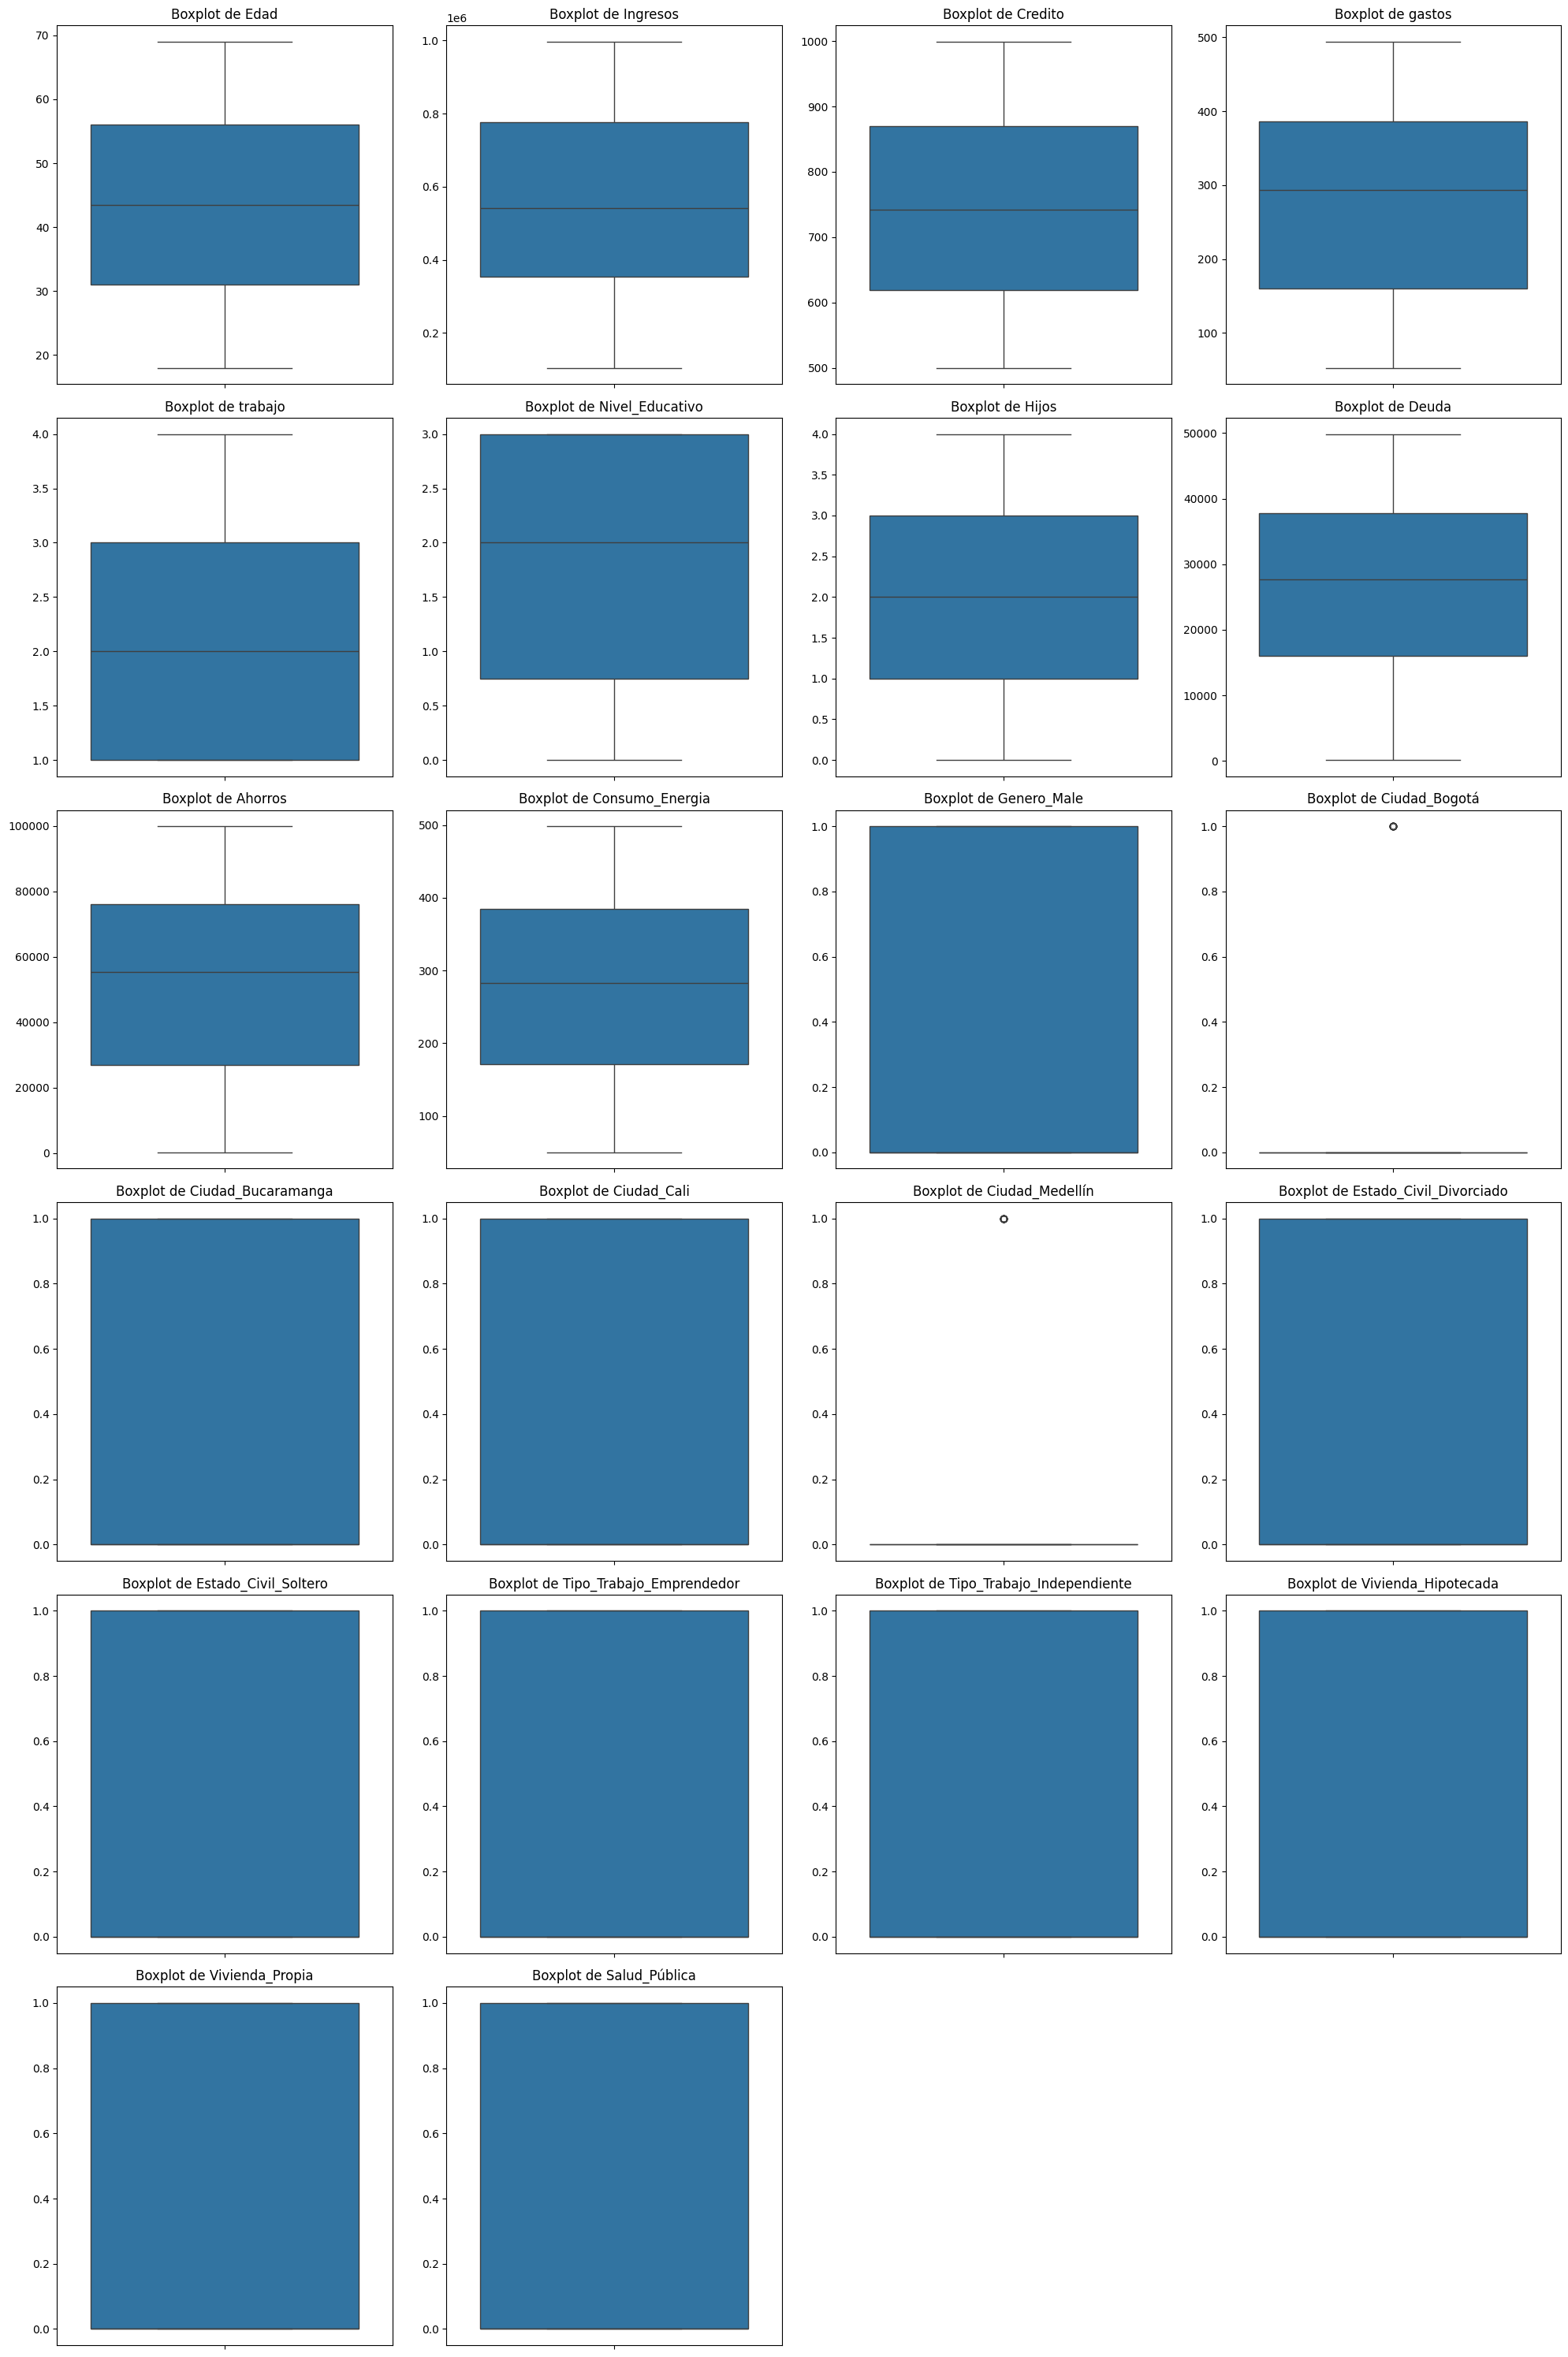

In [8]:
# Crear una figura con subgráficos (4 columnas y 6 filas)

# Calcular el número de gráficos a mostrar
n_cols = len(data_numeric.columns)  # Número de columnas de datos
n_rows = (n_cols // 4) + (n_cols % 4 > 0)  # Número de filas necesarias, redondeando hacia arriba


fig, axes = plt.subplots(nrows=6, ncols=4, figsize=(20, 30))  # Ajusta el tamaño de la figura según sea necesario

# Aplanamos el array de axes para facilitar la iteración
axes = axes.flatten()

# Crear un boxplot para cada variable
for i, column in enumerate(data_numeric.columns):
    sns.boxplot(data=data_numeric[column], ax=axes[i])
    axes[i].set_title(f'Boxplot de {column}')  # Título para cada gráfico
    axes[i].set_xlabel('')  # Eliminamos las etiquetas en el eje X
    axes[i].set_ylabel('')  # Eliminamos las etiquetas en el eje Y

# Eliminar los subgráficos vacíos (los que quedan sin asignar)
for i in range(n_cols, len(axes)):
    axes[i].axis('off')  # Ocultar los subgráficos vacíos


# Ajustamos el layout para evitar superposición de los gráficos
plt.tight_layout()

# Mostrar la figura con todos los gráficos
plt.show()

In [9]:
data_numeric.describe()

,Edad,Ingresos,Credito,gastos,trabajo,Nivel_Educativo,Hijos,Deuda,Ahorros,Consumo_Energia
count,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000
mean,43.540000,564169.829956,748.47000,279.910000,2.320000,1.580000,1.95000,26390.225220,53139.513581,274.719552
std,14.301529,261443.985912,146.92391,128.420954,1.144861,1.173616,1.37345,14293.354901,29298.885669,132.282545
min,18.000000,104666.376497,500.00000,53.000000,1.000000,0.000000,0.00000,135.544971,233.939063,50.106886
25%,31.000000,354547.734852,618.50000,160.750000,1.000000,0.750000,1.00000,15976.539485,26905.801514,170.970607
50%,43.500000,541286.140664,742.00000,293.000000,2.000000,2.000000,2.00000,27666.606146,55280.969944,282.539365
75%,56.000000,777634.825600,869.50000,386.750000,3.000000,3.000000,3.00000,37741.065947,76200.472842,384.701339
max,69.000000,996628.329782,999.00000,494.000000,4.000000,3.000000,4.00000,49862.776738,99935.349957,498.351099


###Normalizar los datos
 Normalizamos los datos para garantizar que todas las variables tengan la misma importancia.
 Esto es esencial en PCA, ya que variables con mayores escalas pueden dominar las componentes.

###Entrenamiento del modelo PCA
Creamos un pipeline que incluye la normalización de datos y la aplicación de PCA. Esto asegura que ambos pasos se realicen de forma conjunta.

Este fragmento de código utiliza un pipeline en scikit-learn para realizar el análisis de componentes principales (PCA). A continuación, te explico detalladamente cada paso:

**make_pipeline(StandardScaler(), PCA())**:

    make_pipeline es una función de scikit-learn que facilita la creación de un pipeline. Un pipeline es una forma de encadenar múltiples pasos de procesamiento de datos y modelado en una secuencia, donde el flujo de trabajo es más limpio y fácil de seguir.
    En este caso, el pipeline tiene dos pasos:
        StandardScaler(): Estándariza los datos (los convierte a una distribución con media 0 y desviación estándar 1). Esto es útil porque PCA es sensible a las escalas de las variables; si tus datos tienen escalas muy diferentes (por ejemplo, edad en años y salario en miles de dólares), la estandarización ayuda a que todas las variables tengan el mismo peso en el análisis.
        PCA(): Aplica el análisis de componentes principales (PCA) a los datos, con el objetivo de reducir la dimensionalidad, extrayendo las direcciones (componentes principales) que explican la mayor varianza en los datos.

**pca_pipe.fit(data_numeric)**:

    fit(data_numeric) entrena el pipeline con los datos numéricos contenidos en data_numeric. El pipeline realiza primero la estandarización con StandardScaler y luego aplica PCA a los datos estandarizados.
    En términos sencillos, el pipeline aplica dos transformaciones secuenciales:
        Primero, los datos son estandarizados.
        Luego, PCA encuentra los componentes principales en los datos estandarizados.

**modelo_pca = pca_pipe.named_steps['pca']**:

    Esta línea extrae el modelo PCA que fue entrenado en el pipeline.
    El pipeline tiene un nombre para cada paso, y puedes acceder a cada uno por su nombre a través de named_steps. Aquí, 'pca' es el nombre del paso correspondiente al modelo PCA dentro del pipeline.
    Así, modelo_pca contendrá el modelo PCA entrenado, que te permitirá acceder a propiedades como los componentes principales (modelo_pca.components_), la varianza explicada por cada componente (modelo_pca.explained_variance_ratio_), entre otros.

In [10]:
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(data_numeric)

# Extraemos el modelo PCA entrenado desde el pipeline.
modelo_pca = pca_pipe.named_steps['pca']
modelo_pca.components_

array([[-2.09395204e-01, -3.02747224e-01, -5.72309423e-02,
        -3.37234272e-01, -7.58921748e-02, -1.10624166e-01,
        -9.23879236e-02, -1.83898931e-01, -3.01263321e-02,
         1.39835863e-01, -2.39820366e-01, -6.89338333e-02,
         1.01773870e-01, -2.94583019e-01,  2.30900612e-01,
        -3.05358558e-01,  3.67426883e-01, -2.86331060e-01,
         3.16807717e-01, -1.03745354e-01,  1.56636060e-01,
        -8.98182662e-02],
       [ 1.59624056e-01, -5.75222955e-02,  4.73975935e-02,
         1.18504345e-02,  1.17422513e-01,  1.48301018e-01,
         1.39838032e-02,  1.60463400e-01, -6.42966352e-02,
        -1.06205369e-01,  2.71926925e-01,  2.55295434e-01,
        -2.36887812e-01, -1.80012986e-01,  1.63269258e-01,
         2.94686001e-01, -2.76622881e-01, -3.85791821e-01,
         2.76068485e-01, -2.49369009e-01,  4.15471211e-01,
        -1.19069973e-01],
       [-1.30490286e-01, -7.61103991e-02, -2.99141289e-01,
        -3.33432191e-01, -2.18801903e-01,  4.08840514e-01,
    

###Análisis de componentes principales: Loadings

Este fragmento de código crea un DataFrame con los "loadings" o "cargas" de los componentes principales obtenidos de PCA y luego visualiza estos valores en un heatmap. A continuación, te explicaré cada paso del código y su funcionamiento:

* modelo_pca.components_: Este atributo contiene los componentes principales (loadings) que se han aprendido a partir de los datos. Es una matriz donde cada fila representa un componente principal, y cada columna representa la contribución de una característica original a ese componente.


* Forma de modelo_pca.components_: Tenemos 23 variables en los datos y usas 23 componentes principales (por ejemplo, n_components=6 en PCA), esta matriz tendrá la forma (6, 6), ya que hay 6 componentes y 6 características.


* data_numeric.columns: Proporciona los nombres de las columnas de tus datos numéricos (como 'Edad', 'Ingresos', etc.). Estos nombres se usan como los nombres de las columnas en el DataFrame components_df.

* [f'PC{i+1}' for i in range(n_componentes)]  es equivalente a index=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'.. 'PC23']: Establece los nombres de las filas, que corresponden a los componentes principales. En este caso, como se seleccionan 6 componentes principales, las filas son etiquetadas como PC1, PC2, PC3, etc.

Al final, este paso crea un DataFrame donde cada fila corresponde a un componente principal y cada columna a una de las variables originales. Los valores representan las "cargas" o "contribuciones" de cada variable original en cada componente principal.


In [12]:
datos_escalados=StandardScaler().fit_transform(data_numeric)
datos_escalados=pd.DataFrame(datos_escalados,columns=data_numeric.columns)
datos_escalados

,Edad,Ingresos,Credito,gastos,trabajo,Nivel_Educativo,Hijos,Deuda,Ahorros,Consumo_Energia,...,Ciudad_Bucaramanga,Ciudad_Cali,Ciudad_Medellín,Estado_Civil_Divorciado,Estado_Civil_Soltero,Tipo_Trabajo_Emprendedor,Tipo_Trabajo_Independiente,Vivienda_Hipotecada,Vivienda_Propia,Salud_Pública
0,-0.600147,-0.881946,-0.680428,-0.101035,0.596951,1.216032,1.500112,-1.214765,-1.069856,0.192930,...,-0.608164,-0.592749,1.882938,-0.592749,1.128152,-0.685994,1.277333,-0.701810,1.362770,1.061913
1,-0.037948,1.662448,0.441420,1.573755,-1.158787,-0.496689,1.500112,0.127132,1.520142,-0.089462,...,-0.608164,-0.592749,1.882938,-0.592749,1.128152,1.457738,-0.782881,-0.701810,-0.733799,-0.941697
2,1.226999,1.555769,-1.309757,0.861578,0.596951,1.216032,-0.695174,1.100098,0.851960,-0.637709,...,-0.608164,1.687055,-0.531085,1.687055,-0.886405,-0.685994,-0.782881,1.424887,-0.733799,1.061913
3,0.524250,0.147210,0.632954,-1.501911,-1.158787,0.359671,0.036588,-1.542009,-1.430972,-1.295282,...,-0.608164,-0.592749,-0.531085,-0.592749,-0.886405,1.457738,-0.782881,1.424887,-0.733799,-0.941697
4,-1.162346,1.269359,0.379855,-1.024517,0.596951,0.359671,0.036588,0.026477,0.117939,0.791988,...,-0.608164,-0.592749,-0.531085,1.687055,-0.886405,-0.685994,1.277333,-0.701810,1.362770,-0.941697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1.156724,-0.267336,1.344370,-0.320167,0.596951,-0.496689,-0.695174,-0.743961,-1.645853,0.422447,...,-0.608164,1.687055,-0.531085,-0.592749,-0.886405,1.457738,-0.782881,-0.701810,-0.733799,1.061913
96,0.172876,0.540698,1.713759,-0.054078,0.596951,1.216032,0.036588,0.212711,0.475172,0.849591,...,-0.608164,-0.592749,-0.531085,1.687055,-0.886405,-0.685994,-0.782881,-0.701810,-0.733799,-0.941697
97,0.664800,-0.649022,1.392254,-1.517563,-1.158787,-0.496689,0.036588,0.545566,-1.671341,-1.588141,...,1.644294,-0.592749,-0.531085,-0.592749,1.128152,-0.685994,1.277333,-0.701810,-0.733799,1.061913
98,-0.951521,-1.247945,-0.311039,0.290271,-1.158787,1.216032,-1.426935,-0.266691,0.195076,1.352346,...,-0.608164,1.687055,-0.531085,-0.592749,1.128152,1.457738,-0.782881,1.424887,-0.733799,-0.941697


         Edad  Ingresos   Credito    gastos   trabajo  Nivel_Educativo  \
PC1 -0.209395 -0.302747 -0.057231 -0.337234 -0.075892        -0.110624   
PC2  0.159624 -0.057522  0.047398  0.011850  0.117423         0.148301   
PC3 -0.130490 -0.076110 -0.299141 -0.333432 -0.218802         0.408841   
PC4  0.006727 -0.160951 -0.116594 -0.129845  0.237572        -0.063773   
PC5 -0.234178  0.036586  0.385321 -0.167413 -0.108541        -0.078012   

        Hijos     Deuda   Ahorros  Consumo_Energia  ...  Ciudad_Bucaramanga  \
PC1 -0.092388 -0.183899 -0.030126         0.139836  ...            0.101774   
PC2  0.013984  0.160463 -0.064297        -0.106205  ...           -0.236888   
PC3 -0.246582  0.035915  0.361333        -0.020558  ...           -0.363835   
PC4  0.064431  0.127989  0.037100         0.063593  ...           -0.084873   
PC5 -0.152936 -0.088412 -0.015698         0.232323  ...           -0.306377   

     Ciudad_Cali  Ciudad_Medellín  Estado_Civil_Divorciado  \
PC1    -0.294583  

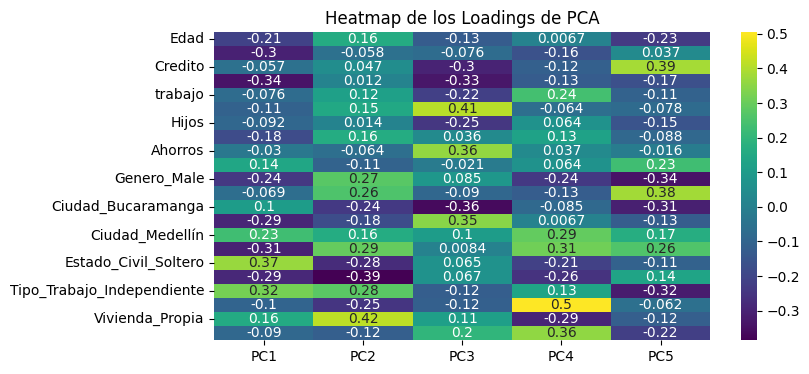

In [13]:
# Extraer los primeros 5 componentes principales
n_componentes = 5
components = modelo_pca.components_[:n_componentes, :]  # Seleccionamos solo los primeros 5 componentes

# Crear el DataFrame con los 5 primeros componentes principales
components_df = pd.DataFrame(
    data=components,
    columns=data_numeric.columns,
    index=[f'PC{i+1}' for i in range(n_componentes)]  # Nombres para los 5 primeros componentes
)

print(components_df)


# Heatmap de los loadings
# -----------------------
# Visualizamos los valores de los loadings en un heatmap.
plt.figure(figsize=(8, 4))
sns.heatmap(components_df.T, annot=True, cmap="viridis")
plt.title("Heatmap de los Loadings de PCA")
plt.show()

In [14]:
components_df

,Edad,Ingresos,Credito,gastos,trabajo,Nivel_Educativo,Hijos,Deuda,Ahorros,Consumo_Energia,...,Ciudad_Bucaramanga,Ciudad_Cali,Ciudad_Medellín,Estado_Civil_Divorciado,Estado_Civil_Soltero,Tipo_Trabajo_Emprendedor,Tipo_Trabajo_Independiente,Vivienda_Hipotecada,Vivienda_Propia,Salud_Pública
PC1,-0.209395,-0.302747,-0.057231,-0.337234,-0.075892,-0.110624,-0.092388,-0.183899,-0.030126,0.139836,...,0.101774,-0.294583,0.230901,-0.305359,0.367427,-0.286331,0.316808,-0.103745,0.156636,-0.089818
PC2,0.159624,-0.057522,0.047398,0.011850,0.117423,0.148301,0.013984,0.160463,-0.064297,-0.106205,...,-0.236888,-0.180013,0.163269,0.294686,-0.276623,-0.385792,0.276068,-0.249369,0.415471,-0.119070
PC3,-0.130490,-0.076110,-0.299141,-0.333432,-0.218802,0.408841,-0.246582,0.035915,0.361333,-0.020558,...,-0.363835,0.346814,0.104306,0.008441,0.065025,0.066712,-0.122642,-0.117895,0.112769,0.197694
PC4,0.006727,-0.160951,-0.116594,-0.129845,0.237572,-0.063773,0.064431,0.127989,0.037100,0.063593,...,-0.084873,0.006729,0.290391,0.310946,-0.213568,-0.256203,0.134831,0.504605,-0.292632,0.355174
PC5,-0.234178,0.036586,0.385321,-0.167413,-0.108541,-0.078012,-0.152936,-0.088412,-0.015698,0.232323,...,-0.306377,-0.126071,0.169175,0.259919,-0.110417,0.135425,-0.318629,-0.061529,-0.119167,-0.219495


A partir de las cargas (loadings) se pueden deducir las Ecuaciones de los Componentes Principales:

Cada componente principal (PC) es una combinación lineal de las variables originales. Dado que tenemos 6 variables (Edad, Ingresos, Credito, gastos, trabajo, Genero), las ecuaciones de cada componente principal se pueden escribir como:

$$PCi=wi1×X1+wi2×X2+wi3×X3+wi4×X4+wi5×X5+wi6×X6...,+wi23×X23$$

$$PC1​=-0.209395Edad​-0.302747Ingreso-0.057231Credito,...,+wi23×X23 $$​

donde:

    PCi​ es el componente principal ii (por ejemplo, PC1, PC2, etc.).
    wij​ es el valor de la carga de la variable Xj​ (en este caso, las variables son Edad, Ingresos, Credito, gastos, trabajo, Genero) en el componente PCi.
    Xj es el valor de la variable jj (por ejemplo, Edad, Ingresos, etc.).




###Varianza explicada por cada componente
Analizamos qué porcentaje de la varianza total explica cada componente principal.

**modelo_pca.explained_variance_ratio_**: Este atributo del modelo PCA contiene el porcentaje de varianza que es explicado por cada uno de los componentes principales. Los valores están entre 0 y 1, y cada componente principal tiene un valor que refleja qué proporción de la varianza total de los datos originales es explicado por ese componente.

El **print** mostrará estos valores para cada componente principal.

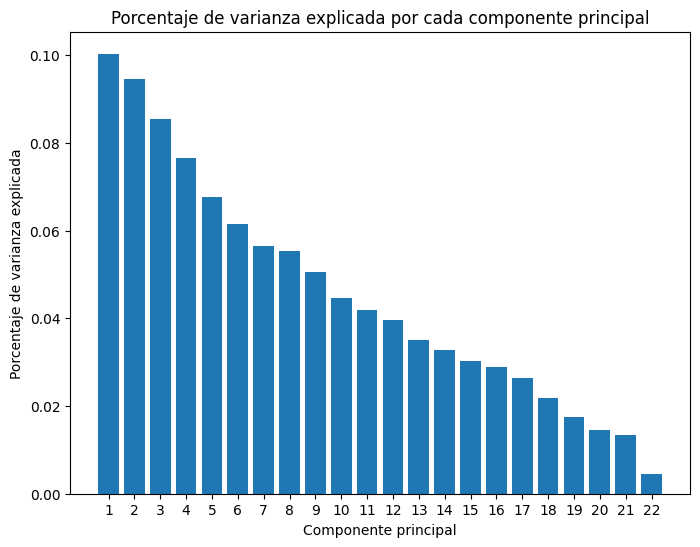

In [15]:
# Obtener el número total de componentes
n_componentes_totales = modelo_pca.n_components_

# Gráfico de barras: Porcentaje de varianza explicada por todos los componentes
plt.figure(figsize=(8, 6))
plt.bar(
    x=np.arange(n_componentes_totales) + 1,  # Numeramos del 1 al n_componentes_totales
    height=modelo_pca.explained_variance_ratio_  # Usamos todos los componentes
)
plt.title('Porcentaje de varianza explicada por cada componente principal')
plt.xlabel('Componente principal')
plt.ylabel('Porcentaje de varianza explicada')
plt.xticks(np.arange(1, n_componentes_totales + 1))  # Asegura que todos los componentes se muestren
plt.show()


###Varianza acumulada
Calculamos y graficamos la varianza acumulada para decidir cuántas componentes usar. Usaremos para este ejercicio como punto de selección de número de componentes el 0.8

Porcentaje de varianza explicada acumulada de todos los componentes:
[0.10032524 0.19497736 0.28045308 0.35702281 0.42478402 0.48620721
 0.54279448 0.59822571 0.64878474 0.69340818 0.73537117 0.77496113
 0.80995155 0.84263055 0.87296041 0.90181419 0.92815527 0.95007402
 0.96753903 0.98203906 0.99549624 1.        ]


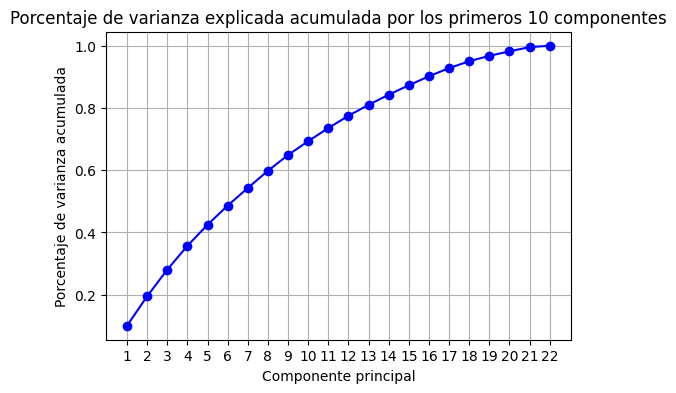

In [16]:
# Número de componentes a mostrar (en este caso, 10)
n_componentes = 22

# Calcular la varianza explicada acumulada solo para los primeros 10 componentes
prop_varianza_acum = modelo_pca.explained_variance_ratio_[:n_componentes].cumsum()

print('Porcentaje de varianza explicada acumulada de todos los componentes:')
print(prop_varianza_acum)

# Gráfico: Porcentaje de varianza explicada acumulada de los componente
plt.figure(figsize=(6, 4))
plt.plot(np.arange(n_componentes) + 1, prop_varianza_acum, marker='o', linestyle='-', color='b')
plt.title('Porcentaje de varianza explicada acumulada por los primeros 10 componentes')
plt.xlabel('Componente principal')
plt.ylabel('Porcentaje de varianza acumulada')
plt.xticks(np.arange(1, n_componentes + 1))  # Asegura que los valores del eje X sean del 1 al 10
plt.grid(True)
plt.show()

Vamos a tomar los primeros 13 primeras componentes donde se conseguiría explicar el 0.80995155 de la varianza observada.

Como se observo en los pasos anteriores, si tomara solo los primeros 5 (el acumuluado es muy bajo, solo el 0.42, pero a nivel de ejemplo) componentes se podría analizar asi:

* El primer componente principal (PC1) se calcula como una combinación lineal de las variables originales del conjunto de datos. La ecuación general del primer componente sería:

$$PC1 = w_1 \cdot \text{Edad} + w_2 \cdot \text{Ingresos} + w_3 \cdot \text{Credito} + w_4 \cdot \text{gastos} + w_5 \cdot \text{trabajo} + \dots + w_n \cdot \text{Salud_Pública}$$

Donde w1,w2,w3,…,wn son los loadings o coeficientes que determinan la importancia de cada variable para ese componente principal. Para el PC1, usando los valores que proporcionaste:

$$PC1 = (-0.209395) \cdot \text{Edad} + (-0.302747) \cdot \text{Ingresos} + (-0.057231) \cdot \text{Credito} + (-0.337234) \cdot \text{gastos} + (-0.075892) \cdot \text{trabajo} + \dots + (0.101774) \cdot \text{Ciudad_Bucaramanga} + \dots$$


###PC1:

**Variables dominantes**: Ingresos, gastos, Edad, Ciudad_Bucaramanga.

**Interpretación**: El primer componente parece estar relacionado con un patrón general de riqueza o situación financiera de los individuos, ya que los "Ingresos" y "gastos" tienen los coeficientes más altos en valor absoluto. Los ingresos tienen un coeficiente negativo, lo que sugiere que los individuos con ingresos altos tienden a tener valores bajos en este componente, mientras que los individuos con gastos altos y ubicaciones en Bucaramanga tienden a tener valores altos en el componente.

**Resumen**: Este componente podría estar asociando la situación económica de los individuos, especialmente en términos de ingresos y gastos.

Esto debe repetirse para los restantes 4 componentes usando como coeficiente sus Loadings de PCA.

###Proyección de datos en el espacio PCA
Reducimos la dimensionalidad proyectando los datos originales en las componentes principales.

In [17]:
# Aseguramos que los datos estén correctamente en formato numpy sin perder los nombres de columna
data_numeric_numpy = data_numeric.to_numpy()

# Ajustamos el modelo PCA
modelo_pca.fit(data_numeric_numpy)

# Realizamos la transformación de los primeros 13 componentes
proyecciones = modelo_pca.transform(data_numeric_numpy)

# Creamos el DataFrame de las proyecciones con nombres de las columnas
proyecciones_df = pd.DataFrame(
    data=proyecciones[:, :13],
    columns=[f'PC{i+1}' for i in range(13)]
)

proyecciones_df.head()


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
0,-229435.642473,-31266.178711,-16972.484838,-101.082348,41.175122,51.276212,-7.466791,1.283112,-1.294600,2.306354,0.792867,0.142441,-0.324077
1,432388.441132,45019.322096,979.869796,85.491284,-153.383830,107.181987,-4.933830,1.470715,-1.575356,-1.405786,0.195937,0.450554,0.228461
2,404722.450440,25246.454432,14567.549122,-192.097633,-46.850257,88.924517,13.881675,-1.114888,0.451647,0.957095,-0.702045,-0.657688,-0.437485
3,38279.647151,-41247.090514,-22823.754375,-62.784409,-11.544245,-266.606632,12.008522,-0.390783,-1.484389,0.007701,-0.695016,-0.303525,0.229169
4,330195.786329,3999.075863,-804.858390,66.033780,166.966672,-71.481410,-14.059438,0.700165,-0.107664,0.899841,1.265601,-0.893975,-0.092261


Hecho el paso anterior ya se puede utilizar este dataset final (proyeciones) para aplicar los modelos de predicción supervisados o no supervidados, que requiera.

###Reconstrucción de datos originales
Una vez aplicados modelos predictivos de regresióno o clasificiación y de clusterización, se hace necesario recuperar los valores originales de las caracteristicas. Para esto usamos el método inverse_transform para reconstruir los datos originales desde las proyecciones.

In [18]:
recostruccion = pca_pipe.inverse_transform(proyecciones)
recostruccion_df = pd.DataFrame(
    data=recostruccion,
    columns=data_numeric.columns
)

# Comparación: Valores originales vs reconstruidos
print('Valores originales (primeras filas):')
print(pd.DataFrame(data_numeric, columns=data_numeric.columns).head())

print('Valores reconstruidos (primeras filas):')
recostruccion_df.head()

Valores originales (primeras filas):
   Edad       Ingresos  Credito  gastos  trabajo  Nivel_Educativo  Hijos  \
0    35  334746.257347      649     267        3                3      4   
1    43  996628.329782      813     481        1                1      4   
2    61  968877.416160      557     390        3                3      1   
3    51  602464.108246      841      88        1                2      2   
4    27  894372.708870      804     149        3                2      2   

          Deuda       Ahorros  Consumo_Energia  ...  Ciudad_Bucaramanga  \
0   9114.193924  21951.052508       300.112962  ...               False   
1  28198.254601  97454.726520       262.944553  ...               False   
2  42035.499294  77975.877479       190.784685  ...               False   
3   4460.216436  11423.792592       104.235160  ...               False   
4  26766.778201  56577.661997       378.960652  ...               False   

   Ciudad_Cali  Ciudad_Medellín  Estado_Civil_Divorciad

,Edad,Ingresos,Credito,gastos,trabajo,Nivel_Educativo,Hijos,Deuda,Ahorros,Consumo_Energia,...,Ciudad_Bucaramanga,Ciudad_Cali,Ciudad_Medellín,Estado_Civil_Divorciado,Estado_Civil_Soltero,Tipo_Trabajo_Emprendedor,Tipo_Trabajo_Independiente,Vivienda_Hipotecada,Vivienda_Propia,Salud_Pública
0,541.584466,8.707927e+10,95624.121859,34396.431866,5.737367,5.083199,7.416260,1.296458e+08,6.399707e+08,39775.428747,...,0.27,0.260000,0.634246,0.260000,0.936387,0.320000,0.865386,0.330000,0.82697,0.969099
1,655.423201,2.592570e+11,119598.862853,61740.760253,3.459122,2.747733,7.416260,4.010537e+08,2.841056e+09,34883.342488,...,0.27,0.260000,0.634246,0.260000,0.936387,0.786476,0.380000,0.330000,0.35000,0.470000
2,911.560355,2.520380e+11,82174.876911,50113.031827,5.737367,5.083199,3.316565,5.978430e+08,2.273208e+09,25385.698887,...,0.27,0.698634,0.220000,0.698634,0.440000,0.320000,0.380000,0.800213,0.35000,0.969099
3,769.261936,1.567217e+11,123692.111315,11524.306720,3.459122,3.915466,4.683130,6.345829e+07,3.330798e+08,13994.096211,...,0.27,0.260000,0.220000,0.260000,0.440000,0.786476,0.380000,0.800213,0.35000,0.470000
4,427.745731,2.326569e+11,118283.175847,19318.718082,5.737367,3.915466,4.683130,3.806957e+08,1.649406e+09,50153.320047,...,0.27,0.260000,0.220000,0.698634,0.440000,0.320000,0.865386,0.330000,0.82697,0.470000
